## Defunciones y recuperaciones de COVID-19 durante la primera mitad de 2020.

Se obtuvo una base de datos referente a la incidencia de COVID-19 durante el primer semestre de 2020 de la siguiente liga:

https://datos.cdmx.gob.mx/dataset/casos-asociados-a-covid-19/resource/1943a45c-542b-4ac2-a319-cd8da9ba36f1

Se realizó un análisis de la tasa de defunciones y recuperaciones en función de las variables poblacionales.

In [1]:
# Importar y configurar las librerías necesarias.
import pandas as pd
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

In [2]:
# Cambiar la ruta segun el sitio donde se encuentre guardado el archivo de datos
path = "~/Documents/PythonEnvINEGI/Data/casos_nacionales_covid-19_2020_semestre1.csv"
data = pd.read_csv(path)
data.head()

,Unnamed: 0,fecha_actualizacion,id_registro,origen,sector,entidad_um,sexo,entidad_nac,entidad_res,municipio_res,...,otro_caso,toma_muestra_lab,resultado_lab,toma_muestra_antigeno,resultado_antigeno,clasificacion_final,migrante,pais_nacionalidad,pais_origen,uci
0,1,2021-11-29,z4e838,USMER,SSA,CIUDAD DE MÉXICO,HOMBRE,MÉXICO,MÉXICO,TEPOTZOTLÁN,...,NO ESPECIFICADO,SI,NO POSITIVO A SARS-COV-2,NO,NO APLICA (CASO SIN MUESTRA),NEGATIVO A SARS-COV-2,NO ESPECIFICADO,MÉXICO,NO APLICA,NO
1,2,2021-11-29,z2b144,FUERA DE USMER,SSA,CIUDAD DE MÉXICO,MUJER,MÉXICO,NaN,NaN,...,SI,SI,RESULTADO NO ADECUADO,NO,NO APLICA (CASO SIN MUESTRA),NO REALIZADO POR LABORATORIO,NO ESPECIFICADO,MÉXICO,NO APLICA,NO APLICA
2,3,2021-11-29,z3d1e2,FUERA DE USMER,SSA,CIUDAD DE MÉXICO,MUJER,CIUDAD DE MÉXICO,NaN,NaN,...,SI,SI,POSITIVO A SARS-COV-2,NO,NO APLICA (CASO SIN MUESTRA),CASO DE SARS-COV-2 CONFIRMADO,NO ESPECIFICADO,MÉXICO,NO APLICA,NO APLICA
3,4,2021-11-29,z23c2e,FUERA DE USMER,SSA,CIUDAD DE MÉXICO,MUJER,CIUDAD DE MÉXICO,NaN,NaN,...,NO,NO,NO APLICA (CASO SIN MUESTRA),NO,NO APLICA (CASO SIN MUESTRA),CASO SOSPECHOSO,NO ESPECIFICADO,MÉXICO,NO APLICA,NO APLICA
4,5,2021-11-29,z3dc7b,USMER,SSA,CIUDAD DE MÉXICO,HOMBRE,CIUDAD DE MÉXICO,NaN,NaN,...,SI,NO,NO APLICA (CASO SIN MUESTRA),NO,NO APLICA (CASO SIN MUESTRA),CASO SOSPECHOSO,NO ESPECIFICADO,MÉXICO,NO APLICA,NO APLICA


La base de datos cuenta con información caso por caso de personas que acudieron a Unidades Médicas de gobierno por sospecha de COVID-19. Se registran variables poblacionales, factores de riesgo, resultados de pruebas y resultados finales de la enfermedad.

### Obteniendo solo casos positivos confirmados.

In [3]:
# Se obtiene la lista de etiquetas posibles para cada caso. Las etiquetas indican, a grandes rasgos,
# si fue confirmado o no el diagnóstico de COVID-19. 
list(data["clasificacion_final"].unique())

['NEGATIVO A SARS-COV-2',
 'NO REALIZADO POR LABORATORIO',
 'CASO DE SARS-COV-2  CONFIRMADO',
 'CASO SOSPECHOSO',
 'INVÁLIDO POR LABORATORIO',
 'CASO DE COVID-19 CONFIRMADO POR ASOCIACIÓN CLÍNICA EPIDEMIOLÓGICA',
 'CASO DE COVID-19 CONFIRMADO POR COMITÉ DE  DICTAMINACIÓN']

In [4]:
# La lista de etiquetas se utiliza para obtener un sub-conjunto de la base de datos compuesto solo por los casos positivos.
casos_positivos = data[data["clasificacion_final"].isin(['CASO DE SARS-COV-2  CONFIRMADO',
       'CASO DE COVID-19 CONFIRMADO POR ASOCIACIÓN CLÍNICA EPIDEMIOLÓGICA',
       'CASO DE COVID-19 CONFIRMADO POR COMITÉ DE  DICTAMINACIÓN'])]

### Codificando los casos que resultaron en defunción como "1" y los casos recuperados como "0".

#### Contando todos los casos que resultaron en defunción y recuperación.

In [5]:
# Se crean las columnas de "defunciones" y "recuperaciones", que indican con 0 y 1 si un caso 
# resultó en fallecimiento o recuperación. Un conteo permite saber cuántos casos de cada tipo hubo.
casos_positivos["defunciones"] = data["fecha_def"].notna().astype(int)
casos_positivos["recuperaciones"] = data["fecha_def"].isna().astype(int)
print(f"Casos positivos resultantes en defunción: {casos_positivos["defunciones"].sum()}.")
print(f"Casos positivos resultantes en recuperación: {casos_positivos["recuperaciones"].sum()}.")
casos_positivos.head()

Casos positivos resultantes en defunción: 11503.
Casos positivos resultantes en recuperación: 62481.


,Unnamed: 0,fecha_actualizacion,id_registro,origen,sector,entidad_um,sexo,entidad_nac,entidad_res,municipio_res,...,resultado_lab,toma_muestra_antigeno,resultado_antigeno,clasificacion_final,migrante,pais_nacionalidad,pais_origen,uci,defunciones,recuperaciones
2,3,2021-11-29,z3d1e2,FUERA DE USMER,SSA,CIUDAD DE MÉXICO,MUJER,CIUDAD DE MÉXICO,NaN,NaN,...,POSITIVO A SARS-COV-2,NO,NO APLICA (CASO SIN MUESTRA),CASO DE SARS-COV-2 CONFIRMADO,NO ESPECIFICADO,MÉXICO,NO APLICA,NO APLICA,0,1
2540,2541,2021-11-29,0629fc,USMER,SSA,CIUDAD DE MÉXICO,MUJER,CHIHUAHUA,NaN,NaN,...,RESULTADO NO ADECUADO,NO,NO APLICA (CASO SIN MUESTRA),CASO DE COVID-19 CONFIRMADO POR ASOCIACIÓN CLÍ...,NO ESPECIFICADO,MÉXICO,NO APLICA,NO,0,1
2563,2564,2021-11-29,0f4c28,USMER,ISSSTE,CIUDAD DE MÉXICO,MUJER,CIUDAD DE MÉXICO,NaN,NaN,...,POSITIVO A SARS-COV-2,NO,NO APLICA (CASO SIN MUESTRA),CASO DE SARS-COV-2 CONFIRMADO,NO ESPECIFICADO,MÉXICO,NO APLICA,NO APLICA,0,1
2569,2570,2021-11-29,07ec95,USMER,SSA,CIUDAD DE MÉXICO,MUJER,CIUDAD DE MÉXICO,NaN,NaN,...,NO APLICA (CASO SIN MUESTRA),NO,NO APLICA (CASO SIN MUESTRA),CASO DE COVID-19 CONFIRMADO POR ASOCIACIÓN CLÍ...,NO ESPECIFICADO,MÉXICO,NO APLICA,NO APLICA,0,1
2590,2591,2021-11-29,0f0c76,USMER,SSA,CIUDAD DE MÉXICO,MUJER,CIUDAD DE MÉXICO,NaN,NaN,...,NO APLICA (CASO SIN MUESTRA),NO,NO APLICA (CASO SIN MUESTRA),CASO DE COVID-19 CONFIRMADO POR ASOCIACIÓN CLÍ...,NO ESPECIFICADO,MÉXICO,NO APLICA,NO APLICA,0,1


De todos los casos positivos 11,503 resultaron en una defunción y 62,481 resultaron en recuperación.

### Análisis por sexo.

Defunciones Hombres: 7836  /  Defunciones Mujeres: 3667
Recuperaciones Hombres: 32454  /  Recuperaciones mujeres: 30027


Text(0.5, 1.0, 'Defunciones y recuperaciones por sexo')

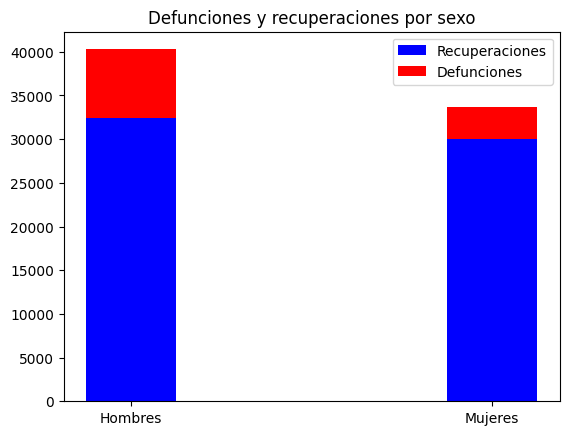

In [13]:
# Se agrupan los datos de defunciones y recuperaciones en función del sexo.

def_hombres, def_mujeres = casos_positivos.groupby("sexo").sum("defunciones")["defunciones"]
rec_hombres, rec_mujeres = casos_positivos.groupby("sexo").sum("recuperaciones")["recuperaciones"]
print(f"Defunciones Hombres: {def_hombres}  /  Defunciones Mujeres: {def_mujeres}")
print(f"Recuperaciones Hombres: {rec_hombres}  /  Recuperaciones mujeres: {rec_mujeres}")
plt.bar(["Hombres", "Mujeres"], [rec_hombres, rec_mujeres], color="b", width=0.25)
plt.bar(["Hombres", "Mujeres"], [def_hombres, def_mujeres], bottom=[rec_hombres, rec_mujeres], color="r", width=0.25)
plt.legend(["Recuperaciones","Defunciones"])
plt.title("Defunciones y recuperaciones por sexo")

Del total de 11,503 defunciones registradas, 7,836 fueron de hombres y 3,667 de mujeres.
De las 62,481 recuperaciones, 32,454 fueron de hombres y 30,027 de mujeres.

Hombres y mujeres se recuperan en proporciones aproximadamente iguales, pero la mortalidad es el doble para los hombres.

### Analizando las defunciones por entidad federativa.

Se utiliza una escala logarítmica debido a la diferencia en el número de casos entre entidades.

#### Determinando cantidades totales de defunciones y porcentajes.

In [7]:
# Se crea una nueva base de datos que contiene únicamente el conteo de defunciones
# por entidad federativa, su porcentaje del total, y el porcentaje acumulado.

defunciones_por_estado = casos_positivos.groupby(["entidad_um"]).\
                                agg({"defunciones":"sum"}).\
                                sort_values(["defunciones"], ascending=False)
defunciones_por_estado["porcentaje"] = (defunciones_por_estado["defunciones"] / defunciones_por_estado["defunciones"].sum()) * 100
defunciones_por_estado["porcent_acum"] = defunciones_por_estado["porcentaje"].cumsum()
defunciones_por_estado

,defunciones,porcentaje,porcent_acum
entidad_um,,,
CIUDAD DE MÉXICO,11034,95.922803,95.922803
MÉXICO,411,3.572981,99.495784
HIDALGO,19,0.165174,99.660958
PUEBLA,15,0.130401,99.791359
QUERÉTARO,7,0.060854,99.852212
GUANAJUATO,4,0.034774,99.886986
MORELOS,4,0.034774,99.921760
TLAXCALA,3,0.026080,99.947840
VERACRUZ DE IGNACIO DE LA LLAVE,3,0.026080,99.973920


#### Graficando la suma de defunciones por estado.

<Axes: title={'center': 'Defunciones por entidad'}, xlabel='entidad_um'>

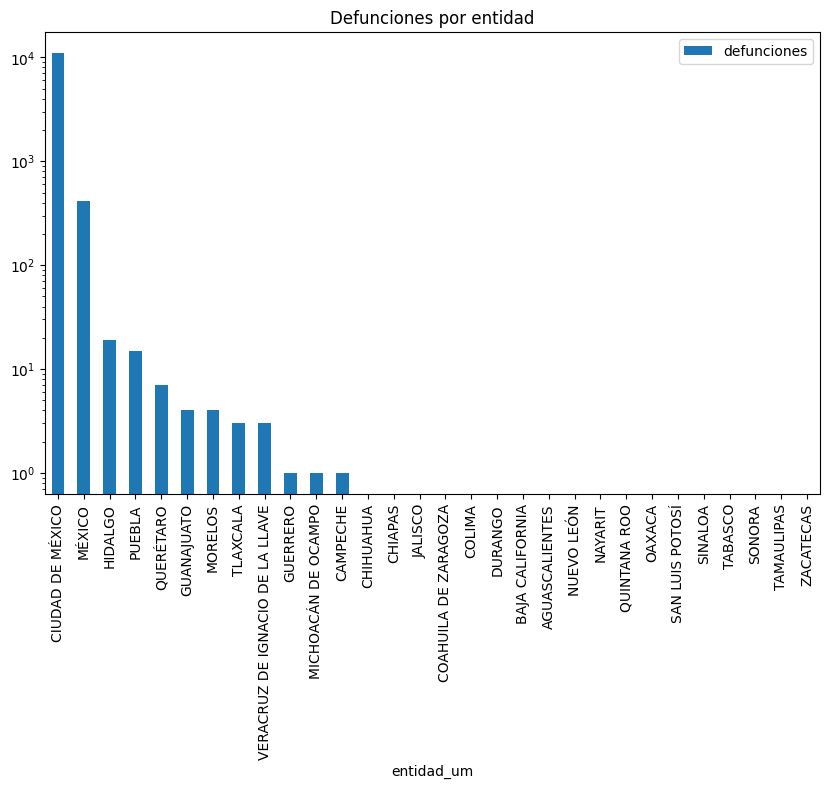

In [11]:
casos_positivos.groupby(["entidad_um"]).\
    agg({"defunciones":"sum"}).\
    sort_values(["defunciones"], ascending=False).\
    plot(kind="bar", figsize=(10,6), logy=True, title="Defunciones por entidad")  # Se utiliza una escala logaritmica dada la enorme diferencia entre estados.

La mayor parte de las defunciones ocurrieron en la Ciudad de México, una porción menor en el Estado de México, y muy pocas en el resto de entidades federativas.

### Determinando la distribución de defunciones y recuperaciones por edades.

<Axes: xlabel='edad'>

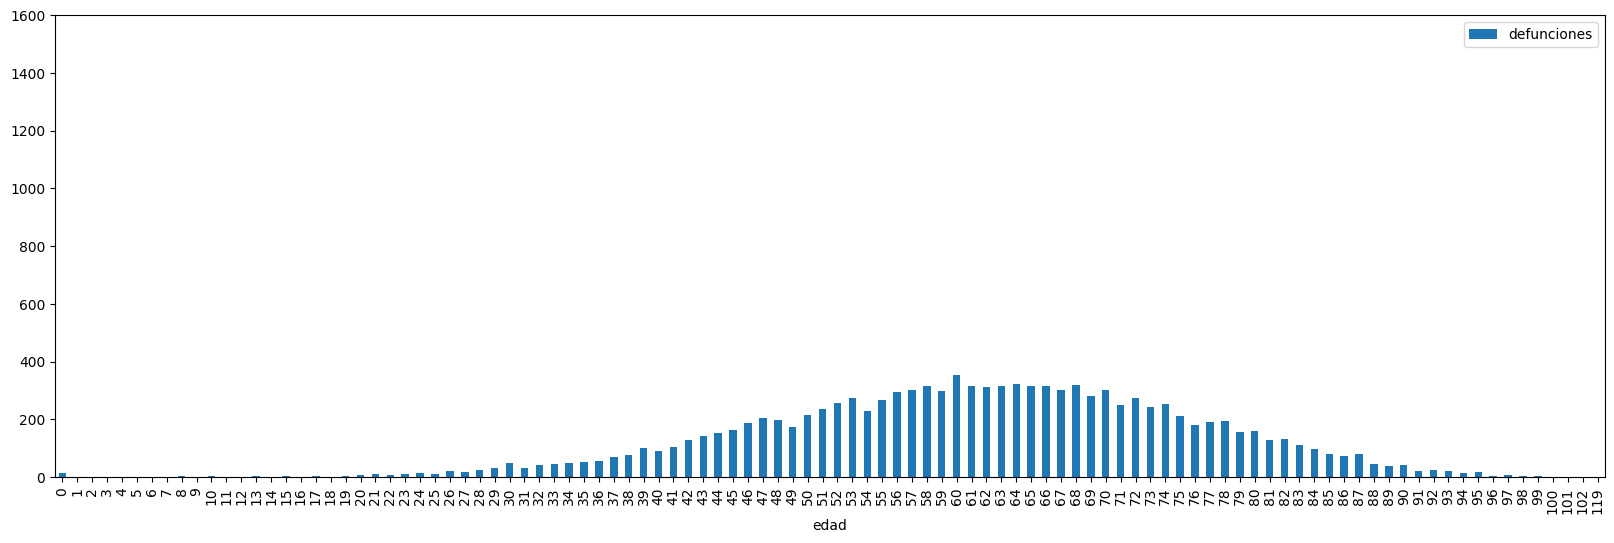

In [9]:
casos_positivos.groupby("edad").agg({"defunciones": "sum"}).plot(kind="bar", figsize=(20, 6), xlim=(0, 100), ylim=(0, 1600))

<Axes: xlabel='edad'>

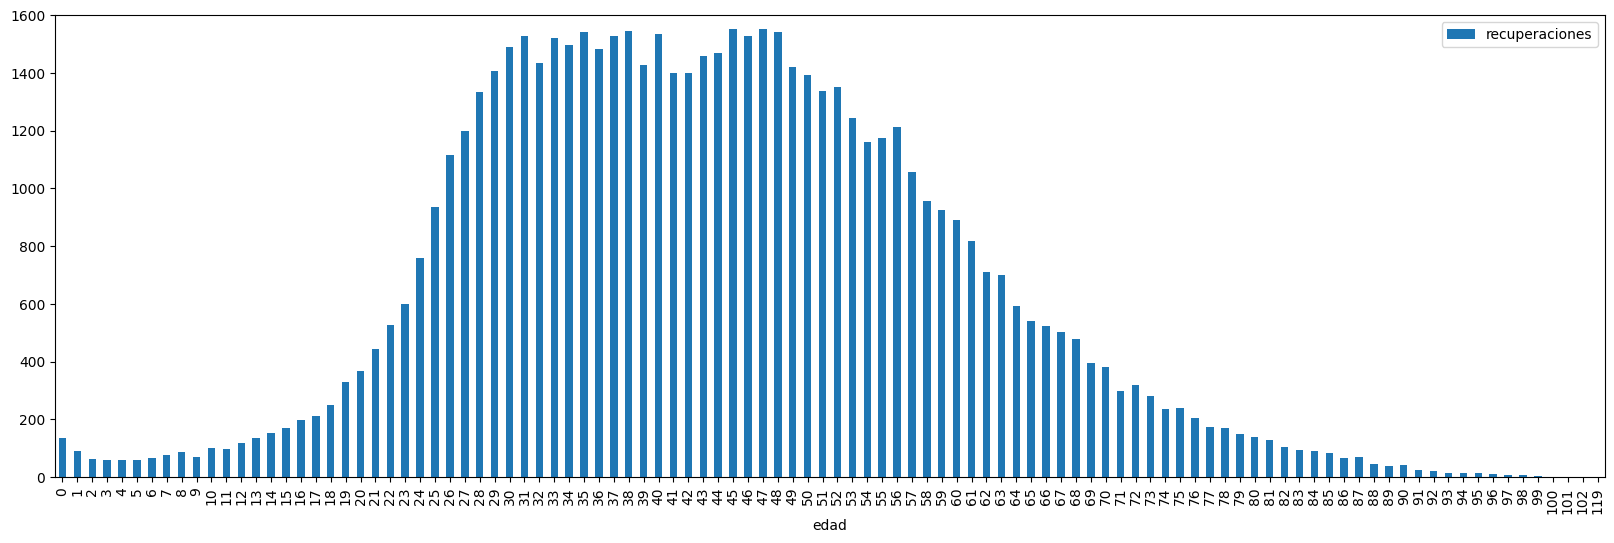

In [10]:
casos_positivos.groupby("edad").agg({"recuperaciones": "sum"}).plot(kind="bar", figsize=(20, 6), xlim=(0, 100), ylim=(0, 1600))

Igualando las escalas de ambas gráficas y comparándolas se puede observar que la mayor parte de las defunciones ocurren alrededor de los 60 a 65 años de edad; mientras, la mayoría de las recuperaciones suceden en población más joven. Esto permite concluir, como ya sabemos ahora, que el COVID-19 resulta en cuadros mucho más severos en poblaciones mayores. Esto, sin embargo, puede verse sesgado dada la distribución poblacional general: es posible que simplemente la población más joven sea más común, y por lo tanto esté sobrerrepresentada en la distribución de recuperaciones.

### Conclusión

El conjunto de datos indica que, si bien las recuperaciones superan por mucho a las defunciones, una cantidad enorme de personas murió durante los primeros meses de la pandemia por COVID-19.
Hombres y mujeres muestran tasas de recuperación muy similares, pero la tasa de mortalidad es significativamente mayor para los hombres.
Además, los grupos más vulnerables parecen ser los adultos mayores, pues en ellos existe una mayor probabilidad de que una enfermedad termine con una defunción.